In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz

In [17]:
# these two function determine the intensity probability function
def f1(y,k,phi0):
    return (np.cos(y*k*phi0)-1)/y/np.sqrt(-np.log(y))
def f2(y,k,phi0):
    return np.sin(y*k*phi0)/y/np.sqrt(-np.log(y))

In [18]:
k_limit = 200
steps = 20001
k = np.linspace(0,k_limit,steps)
d = k_limit/steps

In [19]:
def f1_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(f1,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(f1,0,1,args=(k,phi0))[0]

def f2_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(f2,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(f2,0,1,args=(k,phi0))[0]        

/Users/hstrey/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


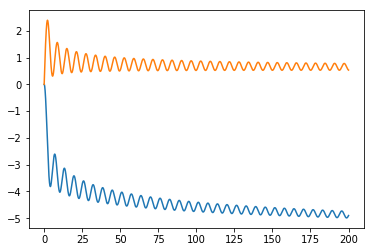

In [20]:
f1k = f1_int(k,1)
f2k = f2_int(k,1)
plt.plot(k,f1k)
plt.plot(k,f2k)

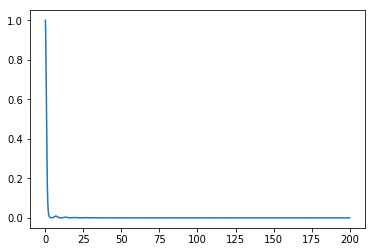

In [21]:
prefactor = np.sqrt(np.pi)
er = np.exp(prefactor*f1k)
ei1 = np.cos(prefactor*f2k)
ei2 = np.sin(prefactor*f2k)
plt.plot(k,er)

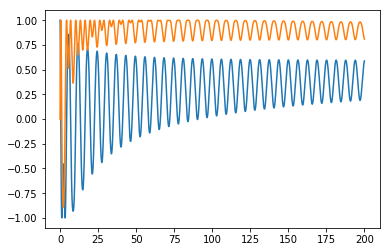

In [22]:
plt.plot(k,ei1)
plt.plot(k,ei2)

(0, 200)

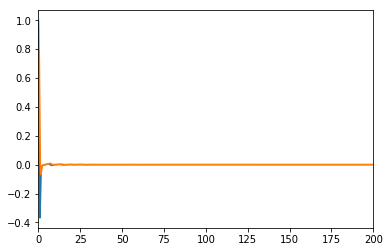

In [23]:
plt.plot(k,er*ei1)
plt.plot(k,er*ei2)
plt.xlim((0,200))

(40001,)
(40001,)


Text(0,0.5,'p(I)')

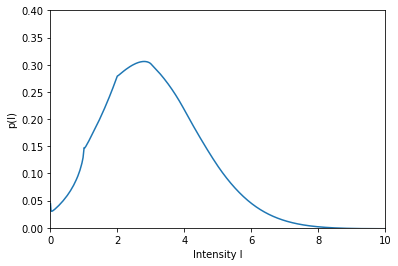

In [29]:
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
print(fc.shape)
cf_fft = np.fft.ifft(fc)*np.sqrt(fc.shape[0]/2)
print(cf_fft.shape)
disp = 20001
plt.plot(freq[:disp],np.real(cf_fft[:disp]))
plt.xlim((0,10))
plt.ylim((0,0.4))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
#plt.savefig("pIanalytic5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [25]:
# normalization
print(trapz(np.real(cf_fft[:steps]),dx=(freq[1]-freq[0])))

1.0655922969356524


In [26]:
# first moment
print(trapz(np.real(cf_fft[:steps]*freq[:steps]),dx=(freq[1]-freq[0])))

0.9137984264170221


In [27]:
print(np.sqrt(1/2/np.pi))

0.3989422804014327
